In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

import os
import numpy as np
import matplotlib.pyplot as plt
import file_loading
from scipy.interpolate import Rbf
from multiprocessing import Pool
from astropy.io import ascii

from forecast import build_interp_zack
from forecast import findlevel
from forecast import plot_cube

In [2]:
%%time
output_cube_name = '1ngal40'
data_dir = '/home/zequnl/Projects/neutrino_mpk/'
table = ascii.read('parameters.table')

params, obsarr_PS, obsarr_PC, ell, kappa, invcov_PS, invcov_PC = \
                file_loading.get_data_arrays_across_redshifts( table,
                    data_dir = data_dir,
                    PS_directory = data_dir + 'powerspectrum_noiseless', 
                    PC_directory = data_dir + 'peakcounts_noiseless',
                    redshifts = ['10'], kappa_min=-0.02)
    

# set up interpolator
interp_PS = build_interp_zack(obsarr_PS, params)
interp_PC = build_interp_zack(obsarr_PC, params)

PS bins [24]
PC bins [154]
PS nr 1000 nb 24 0.974974974974975
PC nr 1000 nb 154 0.8448448448448449
CPU times: user 8.21 s, sys: 636 ms, total: 8.84 s
Wall time: 997 ms


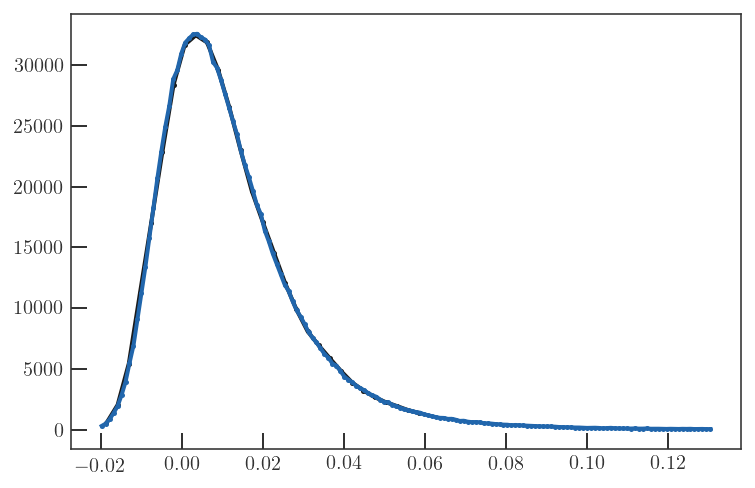

In [3]:

kappa_bins = np.linspace(-0.02,0.06,30)
kappa_x = (kappa_bins[1:] + kappa_bins[:-1])/2. 
def bin_kappa( data_y ):
    digitized = np.digitize(kappa, kappa_bins)
    bin_means = [data_y[digitized == i].mean() for i in range(1, len(kappa_bins))]
    return bin_means

x0, y0, z0 = params[1]

# bin_stuff(kappa)
plt.plot( kappa_x, bin_kappa(interp_PC( [x0, y0, z0] )),
           '.-', label='fiducial (0.1,0.3,0.8295)', lw=2.0)
plt.plot( (kappa), (interp_PC( [x0, y0, z0] )),
           '.-', label='fiducial (0.1,0.3,0.8295)', lw=2.0)

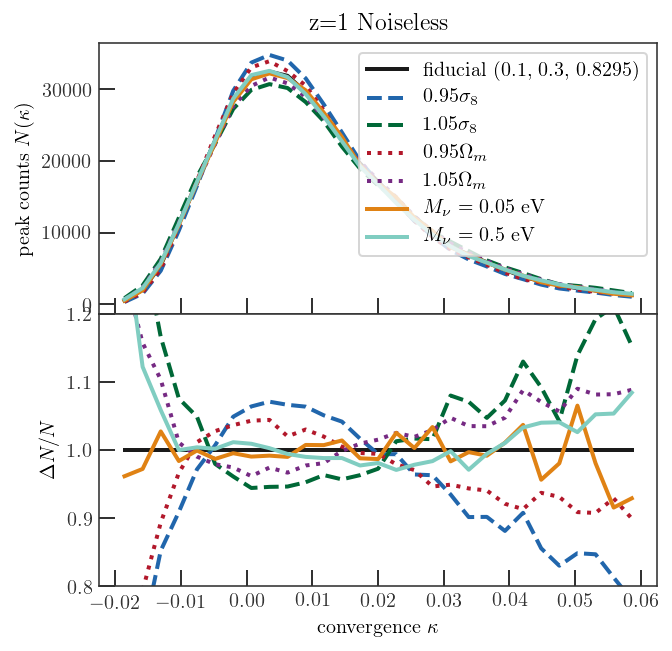

In [7]:
fig, ax = plt.subplots(2,1, figsize=(5,5), sharex=True)

x0, y0, z0 = params[1]

all_lw = 2.0
ax[0].plot( kappa_x, bin_kappa(interp_PC( [x0, y0, z0] )),
           '-', label='fiducial (0.1, 0.3, 0.8295)', lw=2.0)
ax[0].plot( kappa_x, bin_kappa(interp_PC( [ x0   ,  y0   ,  z0 * 0.95 ] )),
           '-', label=r'$0.95 \sigma_8$', lw=all_lw, ls='dashed' )
ax[0].plot( kappa_x, bin_kappa(interp_PC( [ x0   ,  y0   ,  z0 * 1.05 ] )),
           '-', label=r'$1.05 \sigma_8$', lw=all_lw, ls='dashed' )
ax[0].plot( kappa_x, bin_kappa(interp_PC( [ x0   ,  y0 * 0.95   , z0 ] )),
           '-', label=r'$0.95 \Omega_m$', lw=all_lw, ls='dotted' )
ax[0].plot( kappa_x, bin_kappa(interp_PC( [ x0   ,  y0 * 1.05  ,  z0  ] )),
           '-', label=r'$1.05 \Omega_m$', lw=all_lw, ls='dotted' )
ax[0].plot( kappa_x, bin_kappa(interp_PC( [ 0.05   ,  y0   ,  z0 ] )),
           '-', label=r'$M_{\nu} = 0.05$ eV', lw=all_lw, ls='solid' )
ax[0].plot( kappa_x, bin_kappa(interp_PC( [ 0.5   ,  y0   , z0  ] )),
           '-', label=r'$M_{\nu} = 0.5$ eV', lw=all_lw, ls='solid' )
ax[0].legend()


plt.subplots_adjust(wspace=0, hspace=0)

fid_model = interp_PC( [x0,y0,z0] )
ax[1].plot( kappa_x, bin_kappa(fid_model / fid_model) ,
           '-', label='fiducial (0.1, 0.3, 0.8295)', lw=2.0)
ax[1].plot( kappa_x, bin_kappa(interp_PC( [ x0   ,  y0   ,  z0 * 0.95 ] )  / fid_model),
           '-', label=r'$0.95 \sigma_8$', lw=all_lw, ls='dashed' )
ax[1].plot( kappa_x, bin_kappa(interp_PC( [ x0   ,  y0   ,  z0 * 1.05 ] ) / fid_model),
           '-', label=r'$1.05 \sigma_8$', lw=all_lw, ls='dashed' )
ax[1].plot( kappa_x, bin_kappa(interp_PC( [ x0   ,  y0 * 0.95   , z0 ] ) / fid_model),
           '-', label=r'$0.95 \Omega_m$', lw=all_lw, ls='dotted' )
ax[1].plot( kappa_x, bin_kappa(interp_PC( [ x0   ,  y0 * 1.05  ,  z0  ] ) / fid_model),
           '-', label=r'$1.05 \Omega_m$', lw=all_lw, ls='dotted' )
ax[1].plot( kappa_x, bin_kappa(interp_PC( [ 0.05   ,  y0   ,  z0 ] ) / fid_model),
           '-', label=r'$M_{\nu} = 0.05$ eV', lw=all_lw, ls='solid' )
ax[1].plot( kappa_x, bin_kappa(interp_PC( [ 0.5   ,  y0   , z0  ] ) / fid_model),
           '-', label=r'$M_{\nu} = 0.5$ eV', lw=all_lw, ls='solid' )
# ax[0].legend()
ax[1].set_ylim(0.8,1.2)

ax[0].set_ylabel('peak counts $N(\kappa)$')
ax[1].set_ylabel('$\Delta N / N$')
ax[1].set_xlabel('convergence $\kappa$')
ax[0].set_title('z=1 Noiseless')

fig.savefig('figures/fig_effect_on_PC.pdf')

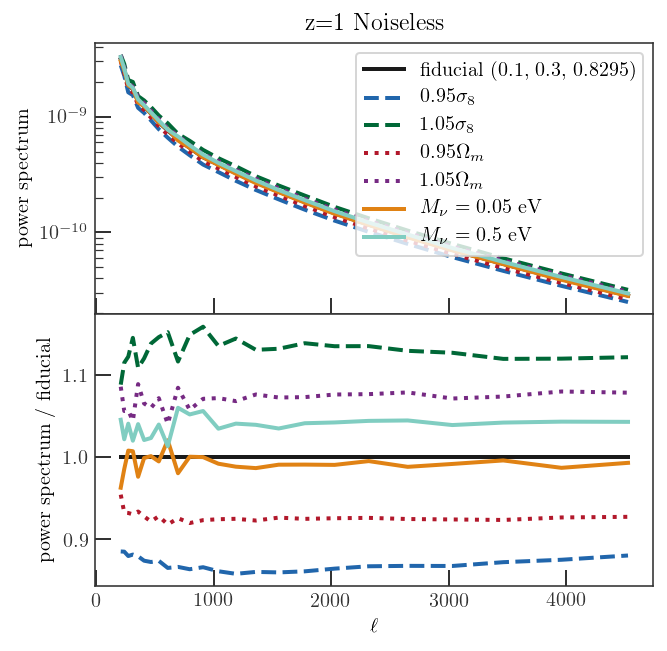

In [8]:
fig, ax = plt.subplots(2,1, figsize=(5,5), sharex=True)

ax[0].plot( ell, interp_PS( [x0, y0, z0] ),
           '-', label='fiducial (0.1, 0.3, 0.8295)', lw=2.0)
ax[0].plot( ell, interp_PS( [ x0   ,  y0   ,  z0 * 0.95 ] ),
           '-',label=r'$0.95 \sigma_8$', lw=all_lw, ls='dashed' )
ax[0].plot( ell, interp_PS( [ x0   ,  y0   ,  z0 * 1.05 ] ),
           '-',label=r'$1.05 \sigma_8$', lw=all_lw, ls='dashed' )
ax[0].plot( ell, interp_PS( [ x0   ,  y0 * 0.95   , z0 ] ),
           '-',label=r'$0.95 \Omega_m$', lw=all_lw, ls='dotted' )
ax[0].plot( ell, interp_PS( [ x0   ,  y0 * 1.05  ,  z0  ] ),
           '-',label=r'$1.05 \Omega_m$', lw=all_lw, ls='dotted' )
ax[0].plot( ell, interp_PS( [ 0.05   ,  y0   ,  z0 ] ),
           '-',label=r'$M_{\nu} = 0.05$ eV', lw=all_lw, ls='solid' )
ax[0].plot( ell, interp_PS( [ 0.5   ,  y0   , z0  ] ),
           '-',label=r'$M_{\nu} = 0.5$ eV', lw=all_lw, ls='solid' )
ax[0].legend()


plt.subplots_adjust(wspace=0, hspace=0)

fid_model = interp_PS( [x0,y0,z0] )
ax[1].plot( ell, fid_model / fid_model ,
           '-', label='fiducial (0.1, 0.3, 0.8295)', lw=2.0)
ax[1].plot( ell, interp_PS( [ x0   ,  y0   ,  z0 * 0.95 ] )  / fid_model,
           '-', label=r'$0.95 \sigma_8$', lw=all_lw, ls='dashed' )
ax[1].plot( ell, interp_PS( [ x0   ,  y0   ,  z0 * 1.05 ] ) / fid_model,
           '-', label=r'$1.05 \sigma_8$', lw=all_lw, ls='dashed' )
ax[1].plot( ell, interp_PS( [ x0   ,  y0 * 0.95   , z0 ] ) / fid_model,
           '-', label=r'$0.95 \Omega_m$', lw=all_lw, ls='dotted' )
ax[1].plot( ell, interp_PS( [ x0   ,  y0 * 1.05  ,  z0  ] ) / fid_model,
           '-', label=r'$1.05 \Omega_m$', lw=all_lw, ls='dotted' )
ax[1].plot( ell, interp_PS( [ 0.05   ,  y0   ,  z0 ] ) / fid_model,
           '-', label=r'$M_{\nu} = 0.05$ eV', lw=all_lw, ls='solid' )
ax[1].plot( ell, interp_PS( [ 0.5   ,  y0   , z0  ] ) / fid_model,
           '-', label=r'$M_{\nu} = 0.5$ eV', lw=all_lw, ls='solid' )
# ax[0].legend()
# ax[1].set_ylim(0.8,1.2)

ax[0].set_ylabel('power spectrum')
ax[1].set_ylabel('power spectrum / fiducial')
ax[1].set_xlabel('$\ell$')
ax[0].set_yscale('log')
# ax[].set_yscale('log')
ax[0].set_title('z=1 Noiseless')

fig.savefig('figures/fig_effect_on_PS.pdf')

# Now Holding $A_s$ Constant

In [6]:
%%time
output_cube_name = '1ngal40'
data_dir = '/home/zequnl/Projects/neutrino_mpk/'
table = ascii.read('parameters.table')

params, obsarr_PS, obsarr_PC, ell, kappa, invcov_PS, invcov_PC = \
                file_loading.get_data_arrays_across_redshifts( table,
                    data_dir = data_dir,
                    PS_directory = data_dir + 'powerspectrum_noiseless', 
                    PC_directory = data_dir + 'peakcounts_noiseless',
                    redshifts = ['10'], kappa_min=-0.02, third_variable='10^9*A_s')
    

# set up interpolator
interp_PS = build_interp_zack(obsarr_PS, params)
interp_PC = build_interp_zack(obsarr_PC, params)

PS bins [24]
PC bins [154]
PS nr 1000 nb 24 0.974974974974975
PC nr 1000 nb 154 0.8448448448448449
CPU times: user 7.16 s, sys: 272 ms, total: 7.43 s
Wall time: 544 ms


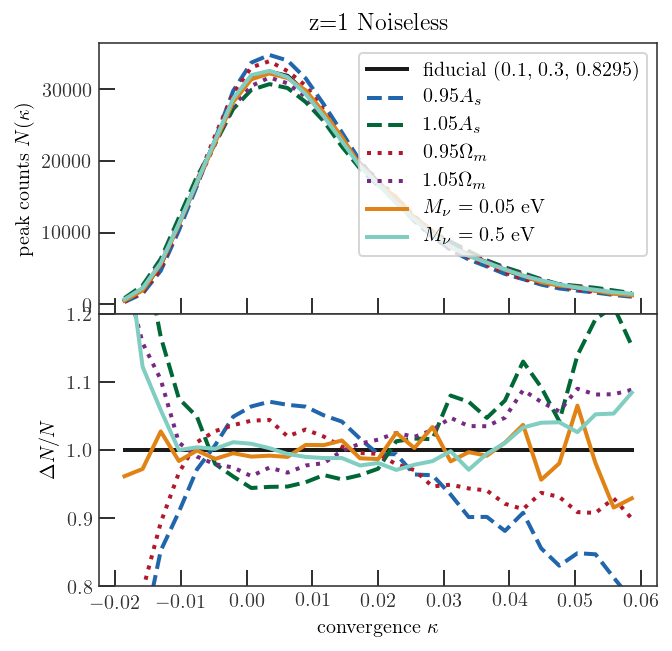

In [10]:
fig, ax = plt.subplots(2,1, figsize=(5,5), sharex=True)

x0, y0, z0 = params[1]

ax[0].plot( kappa_x, bin_kappa(interp_PC( [x0, y0, z0] )),
           '-', label='fiducial (0.1, 0.3, 0.8295)', lw=2.0)
ax[0].plot( kappa_x, bin_kappa(interp_PC( [ x0   ,  y0   ,  z0 * 0.95 ] )),
           '-', label=r'$0.95 A_s$', lw=all_lw, ls='dashed' )
ax[0].plot( kappa_x, bin_kappa(interp_PC( [ x0   ,  y0   ,  z0 * 1.05 ] )),
           '-', label=r'$1.05 A_s$', lw=all_lw, ls='dashed' )
ax[0].plot( kappa_x, bin_kappa(interp_PC( [ x0   ,  y0 * 0.95   , z0 ] )),
           '-', label=r'$0.95 \Omega_m$', lw=all_lw, ls='dotted' )
ax[0].plot( kappa_x, bin_kappa(interp_PC( [ x0   ,  y0 * 1.05  ,  z0  ] )),
           '-', label=r'$1.05 \Omega_m$', lw=all_lw, ls='dotted' )
ax[0].plot( kappa_x, bin_kappa(interp_PC( [ 0.05   ,  y0   ,  z0 ] )),
           '-', label=r'$M_{\nu} = 0.05$ eV', lw=all_lw, ls='solid' )
ax[0].plot( kappa_x, bin_kappa(interp_PC( [ 0.5   ,  y0   , z0  ] )),
           '-', label=r'$M_{\nu} = 0.5$ eV', lw=all_lw, ls='solid' )
ax[0].legend()


plt.subplots_adjust(wspace=0, hspace=0)

fid_model = interp_PC( [x0,y0,z0] )
ax[1].plot( kappa_x, bin_kappa(fid_model / fid_model) ,
           '-', label='fiducial (0.1, 0.3, 0.8295)', lw=2.0)
ax[1].plot( kappa_x, bin_kappa(interp_PC( [ x0   ,  y0   ,  z0 * 0.95 ] )  / fid_model),
           '-', label=r'$0.95 A_s$', lw=all_lw, ls='dashed' )
ax[1].plot( kappa_x, bin_kappa(interp_PC( [ x0   ,  y0   ,  z0 * 1.05 ] ) / fid_model),
           '-', label=r'$1.05 A_s$', lw=all_lw, ls='dashed' )
ax[1].plot( kappa_x, bin_kappa(interp_PC( [ x0   ,  y0 * 0.95   , z0 ] ) / fid_model),
           '-', label=r'$0.95 \Omega_m$', lw=all_lw, ls='dotted' )
ax[1].plot( kappa_x, bin_kappa(interp_PC( [ x0   ,  y0 * 1.05  ,  z0  ] ) / fid_model),
           '-', label=r'$1.05 \Omega_m$', lw=all_lw, ls='dotted' )
ax[1].plot( kappa_x, bin_kappa(interp_PC( [ 0.05   ,  y0   ,  z0 ] ) / fid_model),
           '-', label=r'$M_{\nu} = 0.05$ eV', lw=all_lw, ls='solid' )
ax[1].plot( kappa_x, bin_kappa(interp_PC( [ 0.5   ,  y0   , z0  ] ) / fid_model),
           '-', label=r'$M_{\nu} = 0.5$ eV', lw=all_lw, ls='solid' )
# ax[0].legend()
ax[1].set_ylim(0.8,1.2)

ax[0].set_ylabel('peak counts $N(\kappa)$')
ax[1].set_ylabel('$\Delta N / N$')
ax[1].set_xlabel('convergence $\kappa$')
ax[0].set_title('z=1 Noiseless')


fig.savefig('figures/fig_effect_on_PC_As.pdf')

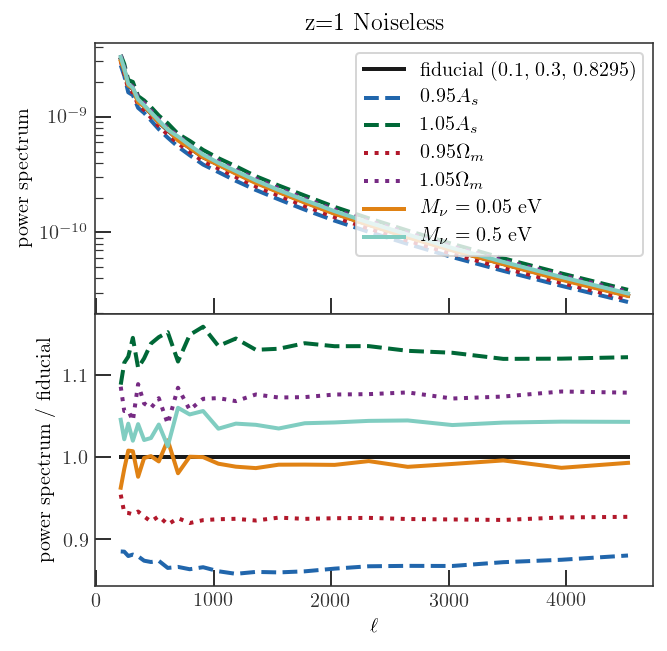

In [11]:
fig, ax = plt.subplots(2,1, figsize=(5,5), sharex=True)

ax[0].plot( ell, interp_PS( [x0, y0, z0] ),
           '-', label='fiducial (0.1, 0.3, 0.8295)', lw=2.0)
ax[0].plot( ell, interp_PS( [ x0   ,  y0   ,  z0 * 0.95 ] ),
           '-',label=r'$0.95 A_s$', lw=all_lw, ls='dashed' )
ax[0].plot( ell, interp_PS( [ x0   ,  y0   ,  z0 * 1.05 ] ),
           '-',label=r'$1.05 A_s$', lw=all_lw, ls='dashed' )
ax[0].plot( ell, interp_PS( [ x0   ,  y0 * 0.95   , z0 ] ),
           '-',label=r'$0.95 \Omega_m$', lw=all_lw, ls='dotted' )
ax[0].plot( ell, interp_PS( [ x0   ,  y0 * 1.05  ,  z0  ] ),
           '-',label=r'$1.05 \Omega_m$', lw=all_lw, ls='dotted' )
ax[0].plot( ell, interp_PS( [ 0.05   ,  y0   ,  z0 ] ),
           '-',label=r'$M_{\nu} = 0.05$ eV', lw=all_lw, ls='solid' )
ax[0].plot( ell, interp_PS( [ 0.5   ,  y0   , z0  ] ),
           '-',label=r'$M_{\nu} = 0.5$ eV', lw=all_lw, ls='solid' )
ax[0].legend()


plt.subplots_adjust(wspace=0, hspace=0)

fid_model = interp_PS( [x0,y0,z0] )
ax[1].plot( ell, fid_model / fid_model ,
           '-', label='fiducial (0.1,0.3,0.8295)', lw=2.0)
ax[1].plot( ell, interp_PS( [ x0   ,  y0   ,  z0 * 0.95 ] )  / fid_model,
           '-', label=r'$0.95 A_s$', lw=all_lw, ls='dashed' )
ax[1].plot( ell, interp_PS( [ x0   ,  y0   ,  z0 * 1.05 ] ) / fid_model,
           '-', label=r'$1.05 A_s$', lw=all_lw, ls='dashed' )
ax[1].plot( ell, interp_PS( [ x0   ,  y0 * 0.95   , z0 ] ) / fid_model,
           '-', label=r'$0.95 \Omega_m$', lw=all_lw, ls='dotted' )
ax[1].plot( ell, interp_PS( [ x0   ,  y0 * 1.05  ,  z0  ] ) / fid_model,
           '-', label=r'$1.05 \Omega_m$', lw=all_lw, ls='dotted' )
ax[1].plot( ell, interp_PS( [ 0.05   ,  y0   ,  z0 ] ) / fid_model,
           '-', label=r'$M_{\nu} = 0.05$ eV', lw=all_lw, ls='solid' )
ax[1].plot( ell, interp_PS( [ 0.5   ,  y0   , z0  ] ) / fid_model,
           '-', label=r'$M_{\nu} = 0.5$ eV', lw=all_lw, ls='solid' )
# ax[0].legend()
# ax[1].set_ylim(0.8,1.2)

ax[0].set_ylabel('power spectrum')
ax[1].set_ylabel('power spectrum / fiducial')
ax[1].set_xlabel('$\ell$')
ax[0].set_yscale('log')
# ax[].set_yscale('log')
ax[0].set_title('z=1 Noiseless')


fig.savefig('figures/fig_effect_on_PS_As.pdf')